<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Image%20Classification%20with%20Flower%20Photo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Image Calssification***
This post is **based on the Tensorflow tutorial** for study purposes. [Link](https://www.tensorflow.org/tutorials/keras/classification)   
If you get a chance, be sure to try the this tutorial.

Now let's **Image Calssification** review, we go through six steps.
- Download and Get the flowers dataset.
- Standardize the data.
- Build and train the model.
- Avoid the over-fitting
- Increase performance with data augmentation.
- Visualize training results and predict on new data.

### ***Get libraries***

In [1]:
import os
import PIL
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### ***Download and explore the dataset***
We uses a dataset of about 3,700 photos of flowers.   
The dataset contains 5 sub-directories, one per class.

In [2]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(
    'flower_photos', origin=url, untar=True
)
data_dir = pathlib.Path(data_dir)

print("Data path:", data_dir)

print("Sub directory:", 
    list(data_dir.iterdir())      
)

Data path: /root/.keras/datasets/flower_photos
Sub directory: [PosixPath('/root/.keras/datasets/flower_photos/dandelion'), PosixPath('/root/.keras/datasets/flower_photos/roses'), PosixPath('/root/.keras/datasets/flower_photos/tulips'), PosixPath('/root/.keras/datasets/flower_photos/daisy'), PosixPath('/root/.keras/datasets/flower_photos/sunflowers'), PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt')]


Image count: 3670


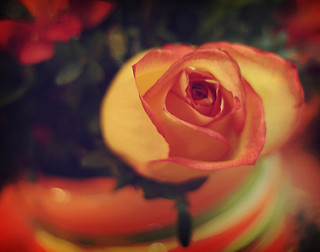

In [3]:
image_count = len(
    list(data_dir.glob("*/*.jpg"))
)
print("Image count:", image_count)

roses = list(
    data_dir.glob("roses/*")
)
PIL.Image.open(str(roses[0]))

In [19]:
seed = 47
batch_size = 32
image_height = 180
image_width = 100

In [7]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
     validation_split=0.2, 
     subset='training', seed=seed,
      image_size=(image_height, image_width),
       batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
     validation_split=0.2, 
     subset='validation', seed=seed,
      image_size=(image_height, imgae_width),
       batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_name = train_dataset.class_names
print(">>> class_name = ", class_name)

>>> class_name =  ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(seed).prefetch(buffer_size=AUTOTUNE)

val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [14]:
normalized_dataset = train_dataset.map(
    lambda x, y: (normalization_layer(x), y)
)
image_batch, labels_batch = next(iter(normalized_dataset))

first_image = image_batch[0]
print(">>> min = {} max = {}".format(
    np.min(first_image), np.max(first_image))
)

>>> min = 0.0 max = 1.0


In [20]:
num_classes = 5

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [21]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 12, 64)        0

In [24]:
epochs=10
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 39s 56ms/step - loss: 1.2385 - accuracy: 0.4748 - val_loss: 1.0489 - val_accuracy: 0.5790
Epoch 2/10
92/92 [==============================] - 2s 26ms/step - loss: 0.9511 - accuracy: 0.6267 - val_loss: 1.0358 - val_accuracy: 0.5872
Epoch 3/10
92/92 [==============================] - 2s 25ms/step - loss: 0.8087 - accuracy: 0.6877 - val_loss: 0.9714 - val_accuracy: 0.6158
Epoch 4/10
92/92 [==============================] - 2s 25ms/step - loss: 0.6836 - accuracy: 0.7503 - val_loss: 0.9484 - val_accuracy: 0.6526
Epoch 5/10
92/92 [==============================] - 2s 25ms/step - loss: 0.5139 - accuracy: 0.8120 - val_loss: 0.9901 - val_accuracy: 0.6594
Epoch 6/10
92/92 [==============================] - 2s 25ms/step - loss: 0.3705 - accuracy: 0.8675 - val_loss: 1.0175 - val_accuracy: 0.6540
Epoch 7/10
92/92 [==============================] - 2s 25ms/step - loss: 0.2314 - accuracy: 0.9261 - val_loss: 1.1697 - val_accuracy: 0.6390
Epoch 8/10
9